# Data Collection

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('CVDdataset/cardio_train.csv', sep=';')
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


In [3]:
df.shape

(70000, 13)

# Data Cleaning

In [4]:
# Checking for  null values

df.isnull().all()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
# Removing columns containing uniques values that offer no informaation

df.drop(columns=['id'], inplace=True)

In [6]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Duplicates Rows in Dataset are : 24


In [7]:
# Identifying duplicates in the dataset

duplicated = df[df.duplicated(keep=False)]
df.drop_duplicates(keep = 'first', inplace = True)
print('Total {} datapoints remaining with {} features'.format(df.shape[0], df.shape[1]))
duplicated.head()

Total 69976 datapoints remaining with 12 features


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1142,17493,2,169,74.0,120,80,1,1,0,0,1,1
1204,16793,1,165,68.0,120,80,1,1,0,0,1,0
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
1612,20293,1,162,70.0,110,70,1,1,0,0,1,0
2305,20495,1,165,70.0,120,80,1,1,0,0,1,0


In [8]:
# Renaming the attributes for better understanding and clarity
df.rename(columns={'ap_hi': 'systolic', 'ap_lo': 'diastolic', 'active': 'active_lifestyle','gluc': 'glucose','smoke': 'smoking_habit', 'alco': 'alcohol_intake', 'cardio': 'cardiovascular_disease'}, inplace =True)
df.describe()


,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#Handling Outliers

def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
outliers(df[['height', 'weight', 'systolic','diastolic']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819
For the feature systolic, No of Outliers is 1435
For the feature diastolic, No of Outliers is 4632


In [10]:
filtered = df.copy()
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

1234

In [11]:
# Filtering outliers from the dataset for height, weight, systolic and diastolic that fall below 2.5 and above 97.5 percentile of a given range.

filtered.drop(filtered[(filtered['height'] > filtered['height'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['height'] < filtered['height'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] > filtered['weight'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['weight'] < filtered['weight'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] > filtered['systolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['systolic'] < filtered['systolic'].quantile(0.025))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] > filtered['diastolic'].quantile(0.975))].index, inplace=True)
filtered.drop(filtered[(filtered['diastolic'] < filtered['diastolic'].quantile(0.025))].index, inplace=True)


In [12]:
higher_diastolic = filtered['diastolic']> filtered['systolic']
higher_diastolic.sum()

0

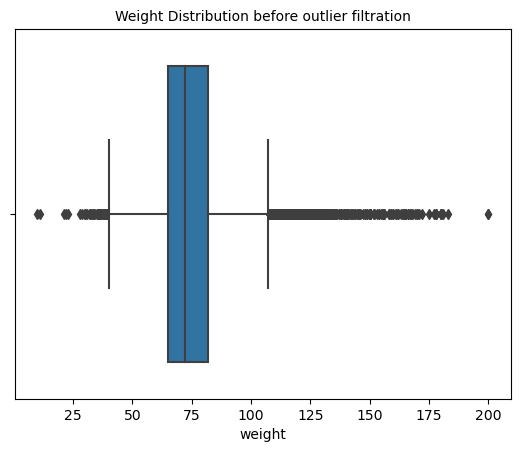

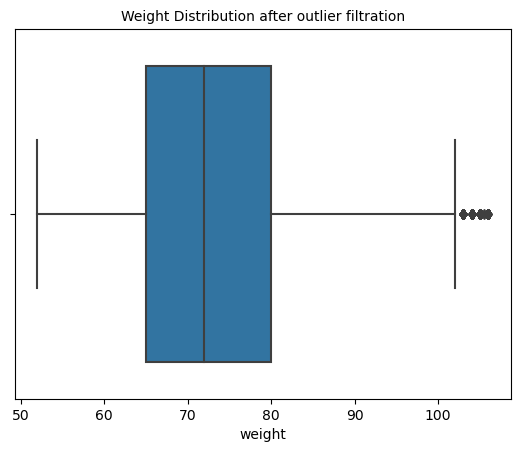

In [13]:
# Visualizing outliers using boxplot  

import seaborn as sns

weight_boxplot = sns.boxplot(x=df['weight'])
weight_boxplot.axes.set_title("Weight Distribution before outlier filtration", fontsize=10)
plt.show()
weight_boxplot = sns.boxplot(x=filtered['weight'])
weight_boxplot.axes.set_title("Weight Distribution after outlier filtration", fontsize=10)
plt.show()

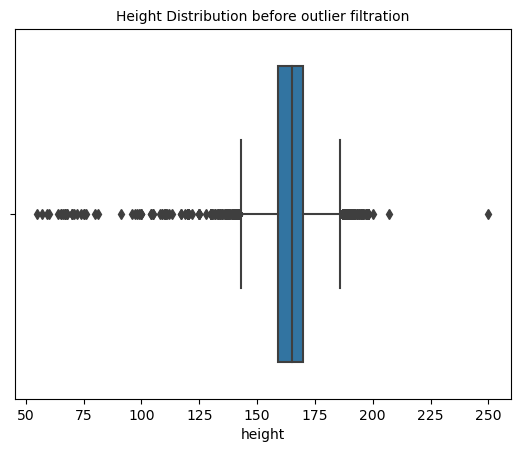

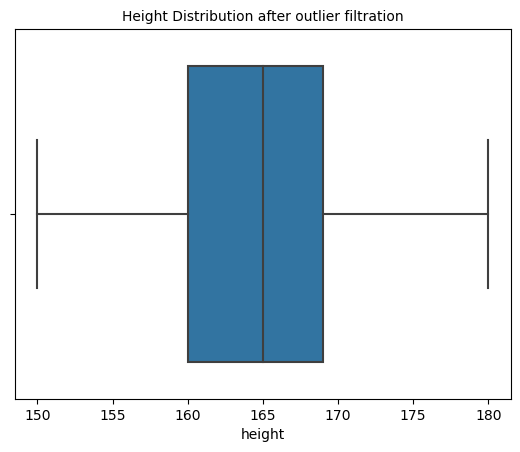

In [14]:
height_boxplot = sns.boxplot(x=df['height'])
height_boxplot.axes.set_title("Height Distribution before outlier filtration", fontsize=10)
plt.show()
height_boxplot = sns.boxplot(x=filtered['height'])
height_boxplot.axes.set_title("Height Distribution after outlier filtration", fontsize=10)
plt.show()

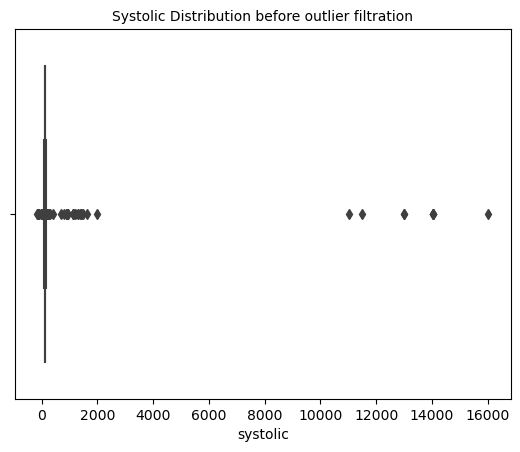

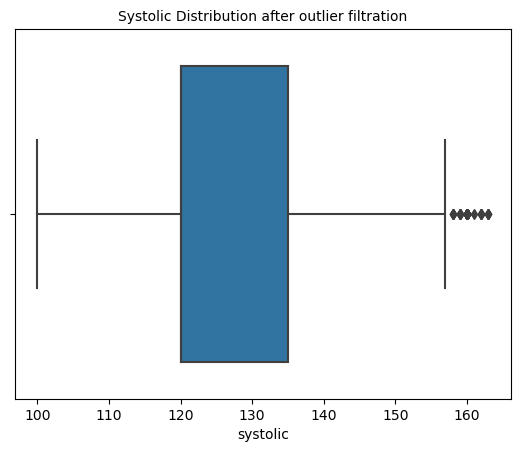

In [15]:
systolic_boxplot = sns.boxplot(x=df['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution before outlier filtration", fontsize=10)
plt.show()
systolic_boxplot = sns.boxplot(x=filtered['systolic'])
systolic_boxplot.axes.set_title("Systolic Distribution after outlier filtration", fontsize=10)
plt.show()

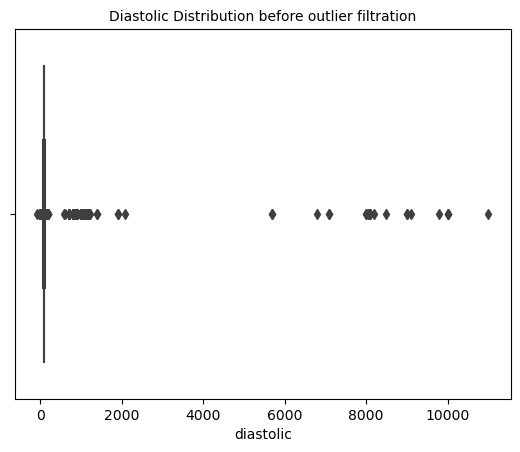

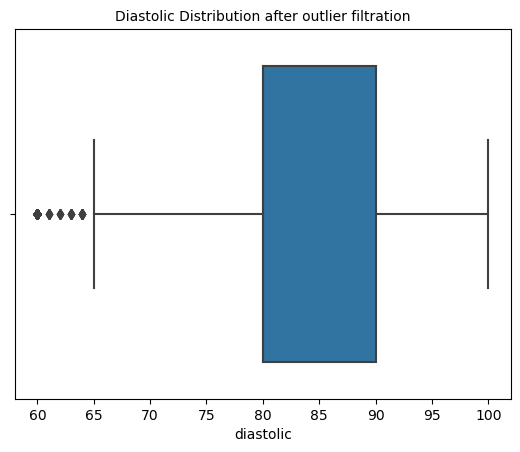

In [16]:
diastolic_boxplot = sns.boxplot(x=df['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution before outlier filtration", fontsize=10)
plt.show()
diastolic_boxplot = sns.boxplot(x=filtered['diastolic'])
diastolic_boxplot.axes.set_title("Diastolic Distribution after outlier filtration", fontsize=10)
plt.show()

In [17]:
filtered.describe()
df = filtered.copy()

# Feature Engineering

In [18]:
# Transforming  age from days to years 
df['age'] = df['age'] // 365

# Attributes Constrution bmi (from height and weight) and pulse pressure (from systolic and diastolic)
# df['bmi'] = round(df['weight'] / (df['height']/100)**2, 2)
# df['pulse_pressure'] = df['systolic'] - df['diastolic']

df.head(3)

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1


In [19]:
# # Feature reduction
# df = df.drop(columns=['height', 'weight', 'systolic','diastolic'])
# df.head(5)

# Exploratory Data Analysis

In [20]:
df.shape

(60118, 12)

In [21]:
# Determining gender distribution
df['gender'].value_counts()

1    39233
2    20885
Name: gender, dtype: int64

In [22]:
# # Determining average bmi by gender
# df.groupby('gender')['bmi'].mean()

In [23]:
df.age.describe()

count    60118.000000
mean        52.840198
std          6.748466
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

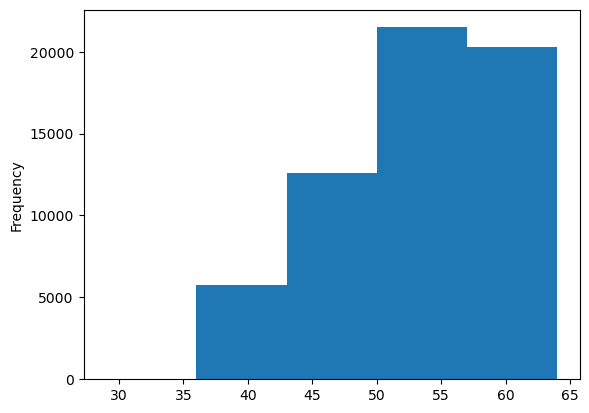

In [24]:
df.age.plot(kind='hist', bins=5)

In [25]:
# Determining CVD distribution
df['cardiovascular_disease'].value_counts() 

0    30762
1    29356
Name: cardiovascular_disease, dtype: int64

In [26]:
# Determining total no of men without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 2 )]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease
0,50,2,168,62.0,110,80,1,1,0,0,1,0
11,51,2,173,60.0,120,80,1,1,0,0,1,0
12,40,2,165,60.0,120,80,1,1,0,0,0,0
19,59,2,162,56.0,120,70,1,1,1,0,1,0
20,54,2,163,83.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69971,55,2,177,80.0,130,80,1,1,0,0,1,0
69973,60,2,175,72.0,130,80,1,1,0,0,1,0
69980,48,2,167,69.0,110,80,1,1,0,1,0,0
69986,49,2,180,78.0,120,80,1,1,0,0,1,0


In [27]:
# Determining total no of women without CVD
# male = 2, female = 1
df [(df['cardiovascular_disease'] == 0) & (df['gender'] == 1 )]

,age,gender,height,weight,systolic,diastolic,cholesterol,glucose,smoking_habit,alcohol_intake,active_lifestyle,cardiovascular_disease
4,47,1,156,56.0,100,60,1,1,0,0,0,0
5,60,1,151,67.0,120,80,2,2,0,0,0,0
6,60,1,157,93.0,130,80,3,1,0,0,1,0
8,48,1,158,71.0,110,70,1,1,0,0,1,0
9,54,1,164,68.0,110,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69977,46,1,168,75.0,120,79,1,1,0,0,1,0
69983,53,1,165,72.0,120,80,1,1,0,0,1,0
69988,60,1,160,59.0,110,70,1,1,0,0,1,0
69991,56,1,159,72.0,130,90,2,2,0,0,1,0


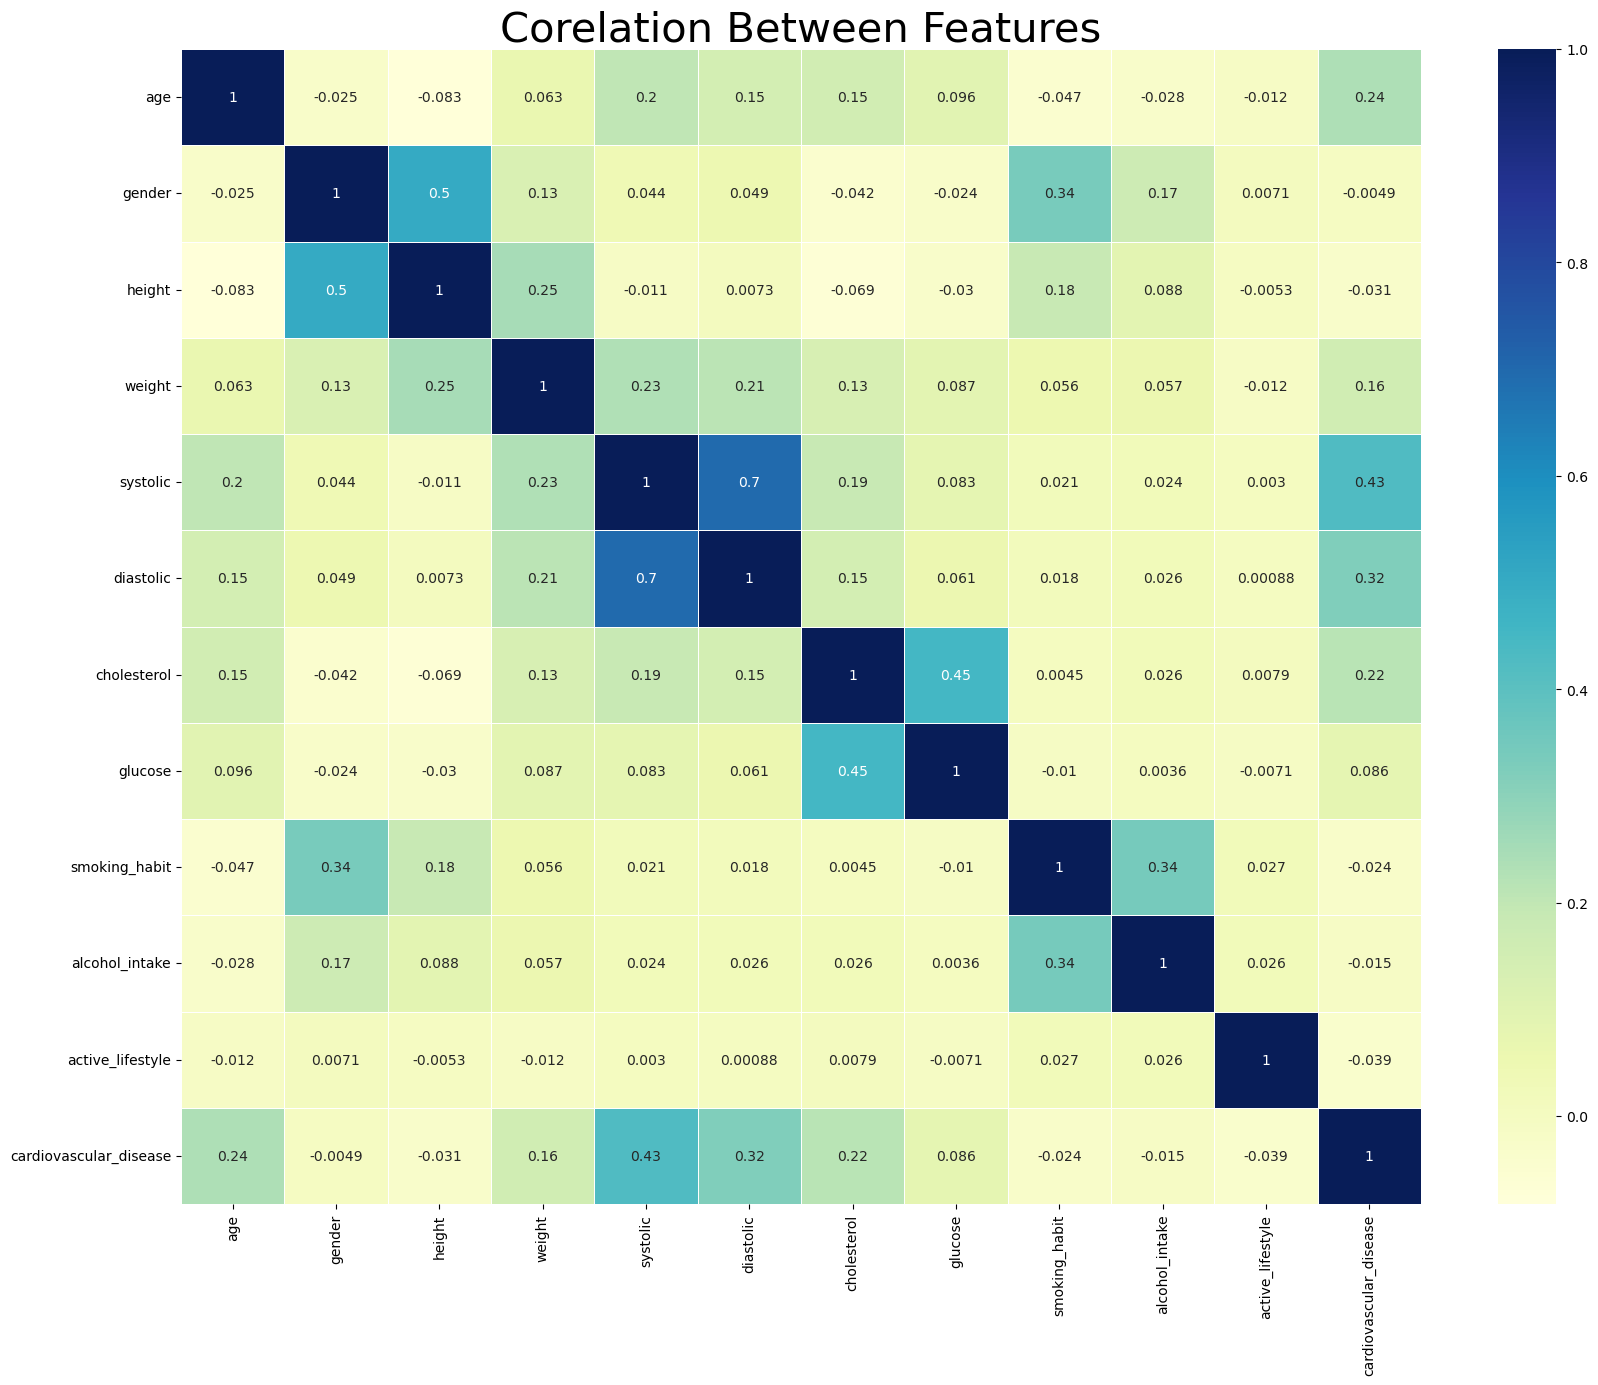

In [28]:
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features', fontsize = 30)
plt.show()

In [ ]:
features = ['age', 'gender', 'height', 'weight', 'systolic', 'diastolic', 'cholesterol','glucose','smoking_habit','cardiovascular_disease']
data = df[features]
g = sns.pairplot(data, hue="cholesterol", corner=True, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
plt.suptitle('Features pairplot' ,fontsize = 24);

In [ ]:
cleaned_data = df.to_csv('cleaned_dataset.csv', index=None)